<div class="alert alert-block alert-info" style="margin-top: 20px">
<center><font size=6.5><strong> Machine Learning Workshop</strong></font></center>

<p><p>
<font size=4> In this workshop, we would use a python library (module) called <b>LASIO</b> to read in <b>.LAS files</b>
 and convert them to <b>.CSV files</b></font>
    
    
<font size=4> To install LASIO, type and run <b> ! pip install lasio</b> in a code cell. </font>
<p></p>

<font size=4> You may need to restart your kernel after the installation. The steps to do that are: </font>
<p></p>

<ol>
    <li><a>Click on <b>Kernel</b> on the menu bar</a></li>
    <li><a>Select <b>Restart</b></a></li>
    <li><a>Click <b>Restart</b> on the pop-up message</a></li>
</ol>

In [1]:
#!pip install lasio

<font size=4><b>Picture to illustrate how to restart the kernel</b></font>
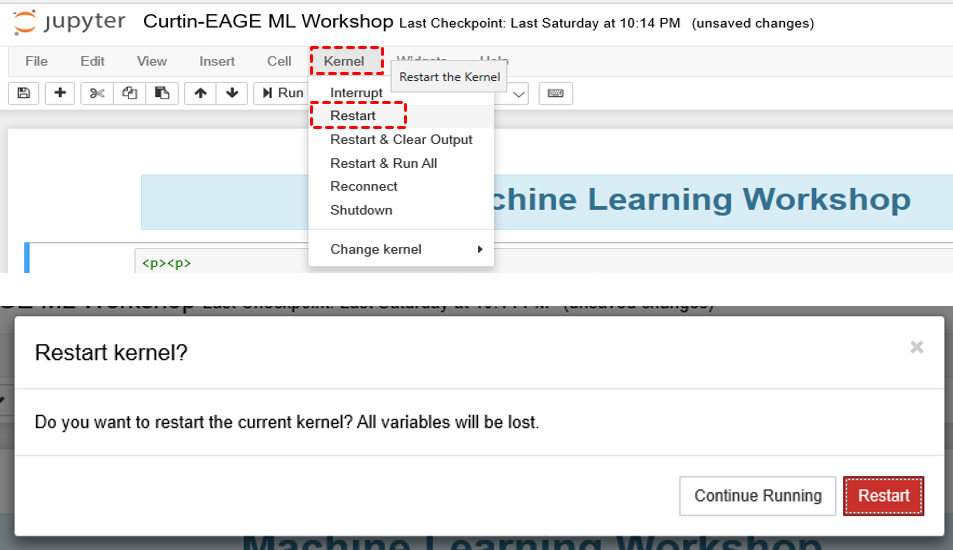

<div class="alert alert-block alert-info" style="margin-top: 20px">
<center><font size=5><strong>Part 1 - Reading and Converting .LAS files to .CSV files </strong></font></center>

## import the necessary modules 

<font size=4>  Now that lasio has been installed and kernel restarted, let's proceed to import some of the modules we need to read in the well logs (.LAS files). We require LASIO to read the LAS files and OS module to navigate perform system-related operations such as creating folders (directories), navigating through directories, etc. </font>

In [2]:
import lasio
import os
import warnings  #Not mandatory; imported to suppress some/all warning messages
warnings.filterwarnings('ignore')

<font size=4> Let's now create a folder/directory named <b>"csv_files"</b> to store the logs in .CSV format. To do that, we would use the mkdir method in OS library. 

Type <b>os.mkdir('csv_files')</b> in a code cell and <b>run ONCE</b></font>

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'available_facies.txt',
 'csv_files',
 'data_exploration.ipynb',
 'data_preparation.ipynb',
 'facies_classification.ipynb',
 'las_files',
 'litho_nomenclatures.txt',
 'README.md']

In [5]:
if not os.path.exists('csv_files'):
    os.mkdir('csv_files')   #make sure you run this only once to avoid errors

<font size = 4>Let's confirm that the directory has been created. To do that, we would use the <b>listdir method in os library </b></font>

In [6]:
os.listdir('./las_files')

['15_9-13.las',
 '16_10-1.las',
 '25_2-14.las',
 '29_6-1.las',
 '30_6-5.las',
 '31_2-8.las',
 '34_10-35.las',
 '34_11-1.las']

In [7]:
path = 'las_files/'

In [8]:
filename = '15_9-13.las'

In [9]:
path + filename

'las_files/15_9-13.las'

In [10]:
filename.split('.')[0]

'15_9-13'

<font size = 4>At this point, it is good to remind ourselves of our current working directory. To do that, we would use the <b>getcwd method in os</b></font>

In [11]:
os.getcwd()

'C:\\Users\\User\\Documents\\GitHub\\quick_training\\Part 2'

<font size = 4>Finally, let's now read the LAS files and convert them to CSV files. This will require few operations as listed below:


<ol>
    <li><a>Step into the directory where the LAS files are stored</a></li>
    <li><a>Loop through the LAS files (one after the other) and read the contents of each file to a variable named "las"</a></li>
    <li><a>Convert this variable to a dataframe named as df</a></li>
    <li><a>convert df to a CSV file and save it in the directory named "csv_files"</a></li>
</ol>
</font>

In [12]:
path = 'las_files/'     # the LAS files are saved in the directory named las_files
for filename in os.listdir(path): # we loop through the files in this directory
    file = open(path + filename) # we open each file
    las = lasio.read(file)       # we read the content of the file with lasio and saved it as las
    data = las.df()    # we convert las to a dataframe, df 
    data.to_csv('csv_files/'+filename.split('.')[0]+'.csv')   # we save the data as a csv file in the directory named csv_files

<font size = 4>To conclude this phase, let's step into the <a>csv_files directory</a> and examine its contents </font>

In [13]:
os.listdir('./csv_files')

['15_9-13.csv',
 '16_10-1.csv',
 '25_2-14.csv',
 '29_6-1.csv',
 '30_6-5.csv',
 '31_2-8.csv',
 '34_10-35.csv',
 '34_11-1.csv']

<font size = 4> <b>Concluding Remarks for Part 1 - </b> For the purpose of this workshop, we would not proceed with LASIO for the remaining part of our data cleaning and exploration. We would use the more familiar <b>pandas module</b> instead.</font>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<center><font size=5><strong>Part 2 - Exploratory Data Analysis (EDA) </strong></font></center>

<font size = 4>Now, let's start with EDA to prepare the training and testing datasets for machine learning. Most of the EDA will be done with <a>pandas module</a>. So, we need to import it first.</font>

In [14]:
import pandas as pd
import glob

In [15]:
glob.glob('*.ipynb')

['data_exploration.ipynb',
 'data_preparation.ipynb',
 'facies_classification.ipynb']

In [16]:
os.chdir('./csv_files')

In [17]:
os.getcwd()

'C:\\Users\\User\\Documents\\GitHub\\quick_training\\Part 2\\csv_files'

In [18]:
glob.glob('*.csv')

['15_9-13.csv',
 '16_10-1.csv',
 '25_2-14.csv',
 '29_6-1.csv',
 '30_6-5.csv',
 '31_2-8.csv',
 '34_10-35.csv',
 '34_11-1.csv']

In [19]:
log_df_v1 = pd.read_csv('30_6-5.csv')

In [20]:
log_df_v2 = log_df_v1.copy()

In [21]:
log_df_v2.columns

Index(['DEPT', 'LITHOLOGY_GEOLINK', 'CALI', 'DRHO', 'NPHI', 'RHOB', 'PEF',
       'GR', 'DTC', 'DTE', 'RDEP', 'SP', 'RSHA', 'RMED'],
      dtype='object')

In [22]:
log_df_v2.drop(columns=['LITHOLOGY_GEOLINK', 'CALI', 'DRHO', 'NPHI', 'RHOB', 'PEF'])

,DEPT,GR,DTC,DTE,RDEP,SP,RSHA,RMED
0,176.609985,9.562881,207.343094,206.224609,1999.987061,-11.649734,0.125,0.440
1,176.762390,9.531000,207.343094,206.224609,1999.994995,-2.402108,0.123,0.481
2,176.914780,9.539561,207.343674,206.224609,2000.004028,6.171341,0.123,0.456
3,177.067184,11.908460,207.348419,206.224609,2000.011841,5.139968,0.126,0.527
4,177.219589,12.571248,207.343094,206.224609,1999.868164,-0.249971,0.433,0.822
...,...,...,...,...,...,...,...,...
22171,3555.470947,187.500000,NaN,NaN,NaN,NaN,NaN,NaN
22172,3555.623291,187.500000,NaN,NaN,NaN,NaN,NaN,NaN
22173,3555.775635,187.500000,NaN,NaN,NaN,NaN,NaN,NaN
22174,3555.927978,187.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
log_df_v2

,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,PEF,GR,DTC,DTE,RDEP,SP,RSHA,RMED
0,176.609985,NaN,22.094002,NaN,NaN,1.0,NaN,9.562881,207.343094,206.224609,1999.987061,-11.649734,0.125,0.440
1,176.762390,NaN,21.156000,NaN,NaN,1.0,NaN,9.531000,207.343094,206.224609,1999.994995,-2.402108,0.123,0.481
2,176.914780,NaN,21.108999,NaN,NaN,1.0,NaN,9.539561,207.343674,206.224609,2000.004028,6.171341,0.123,0.456
3,177.067184,NaN,21.125000,NaN,NaN,1.0,NaN,11.908460,207.348419,206.224609,2000.011841,5.139968,0.126,0.527
4,177.219589,NaN,20.108999,NaN,NaN,1.0,NaN,12.571248,207.343094,206.224609,1999.868164,-0.249971,0.433,0.822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22171,3555.470947,NaN,8.945000,0.054,0.19189,NaN,NaN,187.500000,NaN,NaN,NaN,NaN,NaN,NaN
22172,3555.623291,NaN,8.945000,0.048,0.19189,NaN,NaN,187.500000,NaN,NaN,NaN,NaN,NaN,NaN
22173,3555.775635,NaN,8.945000,0.047,0.19189,NaN,NaN,187.500000,NaN,NaN,NaN,NaN,NaN,NaN
22174,3555.927978,NaN,8.945000,0.047,0.19189,NaN,NaN,187.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
all_logs = []

for file in glob.glob('*.csv'):
    log_df = pd.read_csv(file)
    for log in log_df.columns:
        if log not in all_logs:
            all_logs.append(log)
            
print(all_logs)

['DEPT', 'LITHOLOGY_GEOLINK', 'CALI', 'DRHO', 'NPHI', 'RHOB', 'PEF', 'GR', 'DTC', 'DTE', 'RDEP', 'SP', 'RSHA', 'RXO', 'RMED', 'DCAL', 'BS', 'THOR', 'URAN', 'SGR', 'DTS']


In [25]:
import numpy as np

In [26]:
frames = []
final_wellnames = []

for file in glob.glob('*.csv'):
    log_df1 = pd.read_csv(file)
    log_df1_copy = log_df1.copy()
    
    for log_name in all_logs:
        if log_name not in log_df1_copy.columns:
            log_df1_copy[log_name] = np.nan
            
            
    drop_col = ['CALI', 'DRHO', 'DTE', 'DTS','RSHA', 'RXO', 'RMED', 'DCAL', 'BS', 'THOR', 'URAN', 'SGR', 'PEF']
    log_df1_copy = log_df1_copy.drop(columns = drop_col)
    frames.append(log_df1_copy)
    final_wellnames.append(file.split('.')[0])

final_log = pd.concat(frames, keys = final_wellnames)

In [27]:
final_log

DEPT  LITHOLOGY_GEOLINK  NPHI      RHOB          GR  \
15_9-13 0      494.088104                NaN   NaN  1.981407   75.698517   
        1      494.240509                NaN   NaN  1.982613   77.883408   
        2      494.392914                NaN   NaN  1.984726   79.629509   
        3      494.545319                NaN   NaN  1.988801   80.552368   
        4      494.697723                NaN   NaN  1.989017   78.408279   
...                   ...                ...   ...       ...         ...   
34_11-1 4356  4563.871094                NaN   NaN  2.590000  114.030334   
        4357  4564.023438                NaN   NaN  2.571000  114.679718   
        4358  4564.175781                NaN   NaN  2.577000  115.411469   
        4359  4564.328125                NaN   NaN  2.595000  113.941238   
        4360  4564.480469                NaN   NaN  2.555000  111.075607   

                     DTC      RDEP         SP  
15_9-13 0     163.368820  1.806982  23.181200  
        1     162.982407  1.796002  23.308403  
        2     162.322189  1.797005  24.805607  
        3     160.987106  1.799987  24.586590  
        4     160.981583  1.793023  23.806225  
...                  ...       ...        ...  
34_11-1 4356   73.195999  4.263000        NaN  
        4357   73.195999  4.277000        NaN  
        4358   73.195999  4.314000        NaN  
        4359   73.195999  4.375000        NaN  
        4360   73.195999  4.662000        NaN  

[148505 rows x 8 columns]

In [28]:
final_log.isnull().sum()   

DEPT                     0
LITHOLOGY_GEOLINK    73617
NPHI                 69043
RHOB                  7755
GR                     144
DTC                   2598
RDEP                   262
SP                    1702
dtype: int64

In [29]:
final_log = final_log.dropna()

In [30]:
final_log.isnull().sum()

DEPT                 0
LITHOLOGY_GEOLINK    0
NPHI                 0
RHOB                 0
GR                   0
DTC                  0
RDEP                 0
SP                   0
dtype: int64

In [31]:
final_log

DEPT  LITHOLOGY_GEOLINK      NPHI      RHOB          GR  \
15_9-13 11161  2195.023682                5.0  0.522770  2.201400   44.347900   
        11162  2195.176025                5.0  0.510540  2.263696   46.780998   
        11163  2195.328369                5.0  0.567540  2.261032   50.405998   
        11164  2195.480957                5.0  0.615493  2.218486   50.779697   
        11165  2195.633301                5.0  0.654678  2.214220   49.958050   
...                    ...                ...       ...       ...         ...   
34_11-1 3734   4469.078125                5.0  0.289673  2.568000  127.869041   
        3735   4469.230469                5.0  0.239114  2.566000  124.373451   
        3736   4469.382812                5.0  0.213387  2.568000  120.330902   
        3737   4469.535644                5.0  0.243364  2.548000  115.920326   
        3738   4469.687988                5.0  0.231086  2.556000  112.290565   

                      DTC   RDEP           SP  
15_9-13 11161  116.847565  0.607    68.425003  
        11162  103.989662  0.623    68.800003  
        11163  104.479271  0.635    68.425003  
        11164  112.816071  0.630    69.050003  
        11165  113.581688  0.625    69.175003  
...                   ...    ...          ...  
34_11-1 3734    87.755440  3.579  1224.775024  
        3735    88.038841  3.594  1060.212036  
        3736    88.199249  3.590    18.108999  
        3737    88.136444  3.591 -1156.896973  
        3738    87.528511  3.595 -1560.166016  

[53301 rows x 8 columns]

In [32]:
final_log.columns

Index(['DEPT', 'LITHOLOGY_GEOLINK', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP', 'SP'], dtype='object')

In [33]:
final_log.to_csv("final_log.csv")

In [34]:
data = pd.read_csv('final_log.csv')
data.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'DEPT', 'LITHOLOGY_GEOLINK', 'NPHI', 'RHOB',
       'GR', 'DTC', 'RDEP', 'SP'],
      dtype='object')

In [35]:
data = data.drop(columns = ['Unnamed: 1'])

In [36]:
new_col_names = ['well_names', 'depth', 'facies_ID', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP','SP']
data.columns = new_col_names
data

,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,15_9-13,2195.023682,5.0,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,15_9-13,2195.176025,5.0,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,15_9-13,2195.328369,5.0,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,15_9-13,2195.480957,5.0,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,15_9-13,2195.633301,5.0,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...,...,...,...
53296,34_11-1,4469.078125,5.0,0.289673,2.568000,127.869041,87.755440,3.579,1224.775024
53297,34_11-1,4469.230469,5.0,0.239114,2.566000,124.373451,88.038841,3.594,1060.212036
53298,34_11-1,4469.382812,5.0,0.213387,2.568000,120.330902,88.199249,3.590,18.108999
53299,34_11-1,4469.535644,5.0,0.243364,2.548000,115.920326,88.136444,3.591,-1156.896973


In [37]:
#data['well_names'] = data['well_names'].astype('category')
data['facies_ID'] = data['facies_ID'].astype(int)
data

,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,15_9-13,2195.023682,5,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,15_9-13,2195.176025,5,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,15_9-13,2195.328369,5,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,15_9-13,2195.480957,5,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,15_9-13,2195.633301,5,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...,...,...,...
53296,34_11-1,4469.078125,5,0.289673,2.568000,127.869041,87.755440,3.579,1224.775024
53297,34_11-1,4469.230469,5,0.239114,2.566000,124.373451,88.038841,3.594,1060.212036
53298,34_11-1,4469.382812,5,0.213387,2.568000,120.330902,88.199249,3.590,18.108999
53299,34_11-1,4469.535644,5,0.243364,2.548000,115.920326,88.136444,3.591,-1156.896973


In [38]:
data.describe()

,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
count,53301.000000,53301.000000,53301.000000,53301.000000,53301.000000,53301.000000,53301.000000,53301.000000
mean,3022.230234,6.240952,0.271054,2.442029,71.472714,87.778151,4.236019,63.573629
std,810.944748,3.446902,0.135955,0.158639,37.868071,25.129541,39.587548,261.510478
min,1402.177612,1.000000,-0.035842,1.255000,0.000000,0.427800,0.126700,-1775.347046
25%,2414.784424,5.000000,0.181116,2.354000,46.121395,77.198227,1.557000,58.630260
50%,2923.010742,6.000000,0.282460,2.461304,68.212997,87.329002,2.458942,74.042000
75%,3494.205811,6.000000,0.369280,2.554079,89.931999,99.757919,4.219000,111.025002
max,4819.430664,26.000000,0.877123,3.279993,519.500000,166.718750,2000.000000,1251.349976


In [39]:
# Apply masks
data = data[(data.NPHI >= 0) & (data.SP >= 0)]
data

,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,15_9-13,2195.023682,5,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,15_9-13,2195.176025,5,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,15_9-13,2195.328369,5,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,15_9-13,2195.480957,5,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,15_9-13,2195.633301,5,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...,...,...,...
53294,34_11-1,4468.773438,5,0.317645,2.614000,129.655182,86.686340,3.040,327.859009
53295,34_11-1,4468.925781,5,0.274561,2.601000,130.582397,87.332634,3.399,823.252991
53296,34_11-1,4469.078125,5,0.289673,2.568000,127.869041,87.755440,3.579,1224.775024
53297,34_11-1,4469.230469,5,0.239114,2.566000,124.373451,88.038841,3.594,1060.212036


In [40]:
data.describe()

,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
count,51142.000000,51142.000000,51142.000000,51142.000000,51142.000000,51142.000000,51142.000000,51142.000000
mean,2973.849218,6.272985,0.270584,2.440840,69.634458,87.553459,3.684065,105.212098
std,790.709096,3.460492,0.136682,0.158313,35.834105,25.456793,25.212961,124.459443
min,1402.177612,1.000000,-0.000000,1.279000,0.000000,0.427800,0.126700,1.846000
25%,2394.309876,5.000000,0.179693,2.352000,45.369199,76.716480,1.521954,60.740021
50%,2881.957153,6.000000,0.283331,2.460000,67.229374,87.152946,2.455000,75.526409
75%,3375.237488,6.000000,0.370120,2.553200,87.874599,99.698828,4.254672,111.804836
max,4819.430664,26.000000,0.877123,3.279993,519.500000,166.718750,2000.000000,1251.349976


In [41]:
data_copy = data.copy()
data_copy = data_copy.reset_index(drop=True)

In [42]:
data_copy.well_names.unique()

array(['15_9-13', '16_10-1', '25_2-14', '29_6-1', '30_6-5', '31_2-8',
       '34_10-35', '34_11-1'], dtype=object)

In [43]:
data_copy.index

RangeIndex(start=0, stop=51142, step=1)

In [44]:
max(data_copy[data_copy['well_names'] == '31_2-8'].index)

45428

In [45]:
split_index = max(data_copy[data_copy['well_names'] == '31_2-8'].index)

In [46]:
data_copy[:5]

,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,15_9-13,2195.023682,5,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,15_9-13,2195.176025,5,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,15_9-13,2195.328369,5,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,15_9-13,2195.480957,5,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,15_9-13,2195.633301,5,0.654678,2.214220,49.958050,113.581688,0.625,69.175003


In [47]:
train_and_test_data = data_copy[:split_index+1]
validition_data = data_copy[split_index+1:]

In [48]:
train_and_test_data

,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,15_9-13,2195.023682,5,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,15_9-13,2195.176025,5,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,15_9-13,2195.328369,5,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,15_9-13,2195.480957,5,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,15_9-13,2195.633301,5,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...,...,...,...
45424,31_2-8,3364.632324,5,0.208680,2.540000,72.981003,77.158836,3.337,93.647003
45425,31_2-8,3364.784668,5,0.212740,2.551000,82.141998,77.733780,3.339,93.625999
45426,31_2-8,3364.937012,6,0.209460,2.527000,85.860001,77.804298,3.324,93.498001
45427,31_2-8,3365.089600,6,0.197980,2.497000,76.985001,78.220123,3.222,93.550003


In [49]:
validition_data = validition_data.reset_index(drop=True)
validition_data

,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,34_10-35,3768.373535,13,0.509800,2.243,28.051001,104.931000,1.270,188.250000
1,34_10-35,3768.498535,13,0.493800,2.341,28.462000,108.481003,1.271,188.197006
2,34_10-35,3768.623291,13,0.478500,2.460,27.295000,112.251007,1.273,188.145004
3,34_10-35,3768.751465,13,0.464800,2.588,25.304001,115.614998,1.275,188.091995
4,34_10-35,3768.876465,12,0.452400,2.693,23.403000,118.376999,1.277,188.031998
...,...,...,...,...,...,...,...,...,...
5708,34_11-1,4468.773438,5,0.317645,2.614,129.655182,86.686340,3.040,327.859009
5709,34_11-1,4468.925781,5,0.274561,2.601,130.582397,87.332634,3.399,823.252991
5710,34_11-1,4469.078125,5,0.289673,2.568,127.869041,87.755440,3.579,1224.775024
5711,34_11-1,4469.230469,5,0.239114,2.566,124.373451,88.038841,3.594,1060.212036


In [50]:
train_and_test_data.to_csv('train_and_test_data.csv')
validition_data.to_csv('validition_data.csv')